In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Get data

In [2]:
tau_folder_new = 'E:\\isttc\\results\\allen_mice\\dataset\\cut_30min\\tau_binned\\'
tau_isttc_folder_new = 'E:\\isttc\\results\\allen_mice\\dataset\\cut_30min\\tau_non_binned\\'
#tau_folder_old = 'D:\\isttc\\results\\allen_mice\\z\\binned_pearson\\'
tau_trials = 'E:\\isttc\\results\\allen_mice\\dataset\\cut_30min\\'

In [3]:
tau_new_df = pd.read_pickle(tau_folder_new + 'tau_acf_binned_acf_50_20.pkl')
print(f'tau new len {len(tau_new_df)}')

tau_isttc_df = pd.read_pickle(tau_isttc_folder_new + 'tau_isttc_non_binned_acf_50_20.pkl')
print(f'tau new len {len(tau_isttc_df)}')

# tau_old_df = pd.read_pickle(tau_folder_old + 'tau_bsl_sua_pearson_50ms_20lags_df.pkl')
# print(f'tau old len {len(tau_old_df)}')

tau_trials_df = pd.read_pickle(tau_trials + 'trials_50_50_1000ms_i200.pkl')
print(f'tau trials len {len(tau_trials_df)}')

tau new len 18168
tau new len 18168
tau trials len 201


In [5]:
#tau_trials_df

In [ ]:
# # merge
# tau_new_df.rename(columns={'specimen_id': 'animal_id'}, inplace=True)
# tau_new_df.head(5)

In [7]:
tau_new_df.keys()

Index(['animal_id', 'session_id', 'unit_id', 'area_id', 'acf_0', 'acf_1',
       'acf_2', 'acf_3', 'acf_4', 'acf_5', 'acf_6', 'acf_7', 'acf_8', 'acf_9',
       'acf_10', 'acf_11', 'acf_12', 'acf_13', 'acf_14', 'acf_15', 'acf_16',
       'acf_17', 'acf_18', 'acf_19', 'acf_20', 'tau_ms', 'r_squared'],
      dtype='object')

In [8]:
tau_acf_df_subset = tau_new_df[['animal_id', 'session_id', 'unit_id', 'area_id', 'tau_ms', 'r_squared']].copy()
tau_isttc_df_subset = tau_isttc_df[['animal_id', 'session_id', 'unit_id', 'area_id', 'tau_ms', 'r_squared']].copy()

In [13]:
tau_full_merged_df = tau_acf_df_subset.merge(tau_isttc_df_subset, on=['animal_id', 'session_id', 'unit_id', 'area_id'], 
                                             how='left', suffixes=('_acf', '_isttc'))
tau_full_merged_df.dtypes

animal_id            int64
session_id           int64
unit_id              int64
area_id             object
tau_ms_acf         float64
r_squared_acf      float64
tau_ms_isttc       float64
r_squared_isttc    float64
dtype: object

In [15]:
tau_trials_df['unit_id'] = tau_trials_df['unit_id'].astype(int)

In [16]:
tau_merged_df = tau_trials_df.merge(tau_full_merged_df, on='unit_id', how='left')
tau_merged_df

,unit_id,pearsonr_avg_trial_med,sttc_avg_trial_med,sttc_concat_trial_med,animal_id,session_id,area_id,tau_ms_acf,r_squared_acf,tau_ms_isttc,r_squared_isttc
0,950911624,6.354702083846258,4.646864956274233,4.206174368670224,744912849,766640955,MB,3.864438e+00,0.039105,3.664912,0.442419
1,950911641,4.3292278151931995,4.472060123556686,4.374339383185606,744912849,766640955,MB,3.745150e+00,0.268645,3.681919,0.360840
2,950911686,36.06380944938951,38.98575824257908,3.8554949568629606,744912849,766640955,MB,3.466821e+01,0.825903,3.648698,0.248257
3,950911657,3.875649757831318,3.8933134602197867,14.784551182283067,744912849,766640955,MB,3.388431e+00,0.965243,13.385154,0.962294
4,950911696,216.48755231303835,308.93322328275895,478.14456788918085,744912849,766640955,MB,2.433954e+02,0.983469,391.804846,0.982661
...,...,...,...,...,...,...,...,...,...,...,...
196,950920498,56.321049202541076,28.902476157112545,27.374811999915938,744912849,766640955,VISmma,2.987210e+06,0.757203,4.164967,0.024870
197,950920456,324.6951256839353,346.51054049206505,236.8764080858923,744912849,766640955,VISmma,3.555941e+02,0.975415,489.578046,0.908612
198,950920509,98.46714963945077,69.95770632602898,174.34798592891414,744912849,766640955,VISmma,4.826457e+02,0.970648,317.650837,0.966970
199,950920542,278.25387309031044,328.2220870867344,275.68839667487987,744912849,766640955,VISmma,2.767097e+02,0.992774,351.895156,0.977505


In [20]:
tau_merged_df['pearsonr_avg_trial_med'] = tau_merged_df['pearsonr_avg_trial_med'].astype(float)
tau_merged_df['sttc_avg_trial_med'] = tau_merged_df['sttc_avg_trial_med'].astype(float)
tau_merged_df['sttc_concat_trial_med'] = tau_merged_df['sttc_concat_trial_med'].astype(float)

In [49]:
# tau_merged_df['isttc_diff'] = tau_merged_df['tau_ms_isttc'] - tau_merged_df['tau_ms_acf']
# tau_merged_df['pear_trial_avg_diff'] = tau_merged_df['pearsonr_avg_trial_med'] - tau_merged_df['tau_ms_acf']
# tau_merged_df['sttc_trial_avg_diff'] = tau_merged_df['sttc_avg_trial_med'] - tau_merged_df['tau_ms_acf']
# tau_merged_df['sttc_trial_concat_diff'] = tau_merged_df['sttc_concat_trial_med'] - tau_merged_df['tau_ms_acf']

tau_merged_df['isttc_diff'] = tau_merged_df['tau_ms_acf'] - tau_merged_df['tau_ms_isttc']
tau_merged_df['pear_trial_avg_diff'] = tau_merged_df['pearsonr_avg_trial_med'] - tau_merged_df['tau_ms_isttc']
tau_merged_df['sttc_trial_avg_diff'] = tau_merged_df['sttc_avg_trial_med'] - tau_merged_df['tau_ms_isttc']
tau_merged_df['sttc_trial_concat_diff'] = tau_merged_df['sttc_concat_trial_med'] - tau_merged_df['tau_ms_isttc']

In [50]:
tau_merged_df.keys()

Index(['unit_id', 'pearsonr_avg_trial_med', 'sttc_avg_trial_med',
       'sttc_concat_trial_med', 'animal_id', 'session_id', 'area_id',
       'tau_ms_acf', 'r_squared_acf', 'tau_ms_isttc', 'r_squared_isttc',
       'isttc_diff', 'pear_trial_avg_diff', 'sttc_trial_avg_diff',
       'sttc_trial_concat_diff'],
      dtype='object')

In [51]:
tau_5methods_df_long = pd.melt(tau_merged_df, id_vars=['unit_id'], value_vars=['tau_ms_acf', 'tau_ms_isttc', 
                                                                                   'pearsonr_avg_trial_med', 'sttc_avg_trial_med', 
                                                                               'sttc_concat_trial_med'], 
                  value_name='tau_ms', var_name='method')
tau_5methods_df_long

,unit_id,method,tau_ms
0,950911624,tau_ms_acf,3.864438
1,950911641,tau_ms_acf,3.745150
2,950911686,tau_ms_acf,34.668211
3,950911657,tau_ms_acf,3.388431
4,950911696,tau_ms_acf,243.395433
...,...,...,...
1000,950920498,sttc_concat_trial_med,27.374812
1001,950920456,sttc_concat_trial_med,236.876408
1002,950920509,sttc_concat_trial_med,174.347986
1003,950920542,sttc_concat_trial_med,275.688397


In [52]:
tau_5methods_df_long_diff = pd.melt(tau_merged_df, id_vars=['unit_id'], value_vars=['isttc_diff', 
                                                                                   'pear_trial_avg_diff', 'sttc_trial_avg_diff', 
                                                                               'sttc_trial_concat_diff'], 
                  value_name='tau_ms_diff', var_name='method')
tau_5methods_df_long_diff['tau_ms_diff_abs'] = np.abs(tau_5methods_df_long_diff['tau_ms_diff'])
tau_5methods_df_long_diff

,unit_id,method,tau_ms_diff,tau_ms_diff_abs
0,950911624,isttc_diff,0.199526,0.199526
1,950911641,isttc_diff,0.063231,0.063231
2,950911686,isttc_diff,31.019513,31.019513
3,950911657,isttc_diff,-9.996723,9.996723
4,950911696,isttc_diff,-148.409413,148.409413
...,...,...,...,...
799,950920498,sttc_trial_concat_diff,23.209845,23.209845
800,950920456,sttc_trial_concat_diff,-252.701638,252.701638
801,950920509,sttc_trial_concat_diff,-143.302852,143.302852
802,950920542,sttc_trial_concat_diff,-76.206759,76.206759


### Plots

C:\Users\ipochino\AppData\Local\Temp\ipykernel_16568\3967006206.py:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(ax=axes[0], x='method', y='tau_ms',
C:\Users\ipochino\AppData\Local\Temp\ipykernel_16568\3967006206.py:8: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(ax=axes[1], x='method', y='tau_ms_diff_abs',


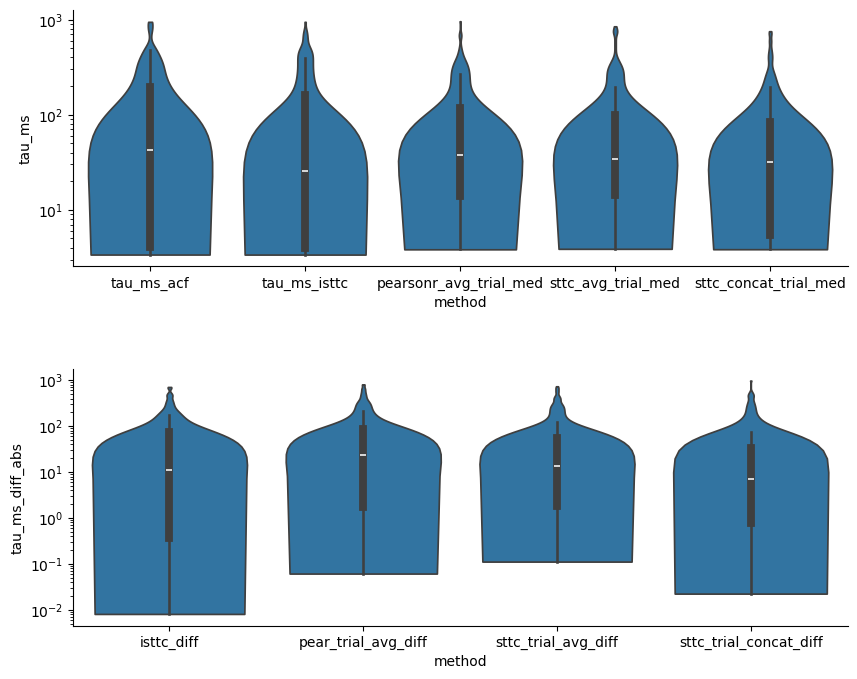

In [55]:
fig, axes = plt.subplots(2,1, figsize=(10,8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.violinplot(ax=axes[0], x='method', y='tau_ms', 
                data=tau_5methods_df_long.query('tau_ms > 0 and tau_ms < 1000'), cut=0,  scale='width')
axes[0].set_yscale('log')

sns.violinplot(ax=axes[1], x='method', y='tau_ms_diff_abs', 
                data=tau_5methods_df_long_diff.query('tau_ms_diff_abs < 1000'), cut=0,  scale='width')
axes[1].set_yscale('log')

sns.despine()

fig.savefig('E:\\isttc\\results\\allen_mice\\dataset\\cut_30min\\' 
            + 'taus_diff_isttc_full_gr_tr.png' , bbox_inches='tight')

In [48]:
tau_5methods_df_long_diff.groupby(by='method', as_index=False).median()

,method,unit_id,tau_ms_diff,tau_ms_diff_abs
0,isttc_diff,950914298.0,0.115853,29.153950
1,pear_trial_avg_diff,950914298.0,0.076898,19.996734
2,sttc_trial_avg_diff,950914298.0,0.593090,23.857590
3,sttc_trial_concat_diff,950914298.0,0.470561,37.755001


In [54]:
tau_5methods_df_long_diff.groupby(by='method', as_index=False).median()

,method,unit_id,tau_ms_diff,tau_ms_diff_abs
0,isttc_diff,950914298.0,-0.115853,29.153950
1,pear_trial_avg_diff,950914298.0,0.305584,33.315475
2,sttc_trial_avg_diff,950914298.0,0.496364,23.728517
3,sttc_trial_concat_diff,950914298.0,0.559251,12.272488


In [ ]:
# nicer df



In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.scatterplot(ax=axes[0], x='tau_ms_old', y='tau_ms_new', data=tau_merged_df)
sns.scatterplot(ax=axes[1], x='r_squared_old', y='r_squared_new', data=tau_merged_df)

sns.despine()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.scatterplot(ax=axes[0], x='tau_ms_old', y='tau_ms_new', 
                data=tau_merged_df.query('tau_ms_old <= 1000 and tau_ms_old > 0 and tau_ms_new <= 1000 and tau_ms_new > 0').copy())
sns.scatterplot(ax=axes[1], x='r_squared_old', y='r_squared_new', 
                data=tau_merged_df.query('tau_ms_old <= 1000 and tau_ms_old > 0 and tau_ms_new <= 1000 and tau_ms_new > 0').copy())

axes[0].set_aspect('equal', adjustable='box')
axes[1].set_aspect('equal', adjustable='box')

sns.despine()

In [ ]:
tau_merged_df['area_id_new'].unique()

In [ ]:
rudelt_areas_query = 'area_id_new == "VISp" or area_id_new == "VISl" or area_id_new == "VISal" or area_id_new == "VISrl" or area_id_new == "VISam" or area_id_new == "VISpm"'
hp_areas_query = 'area_id_new == "CA1" or area_id_new == "CA2" or area_id_new == "CA3" or area_id_new == "DG" or area_id_new == "SUB"'
tau_0_1000_query = 'tau_ms_old <= 1000 and tau_ms_old > 0 and tau_ms_new <= 1000 and tau_ms_new > 0'

In [ ]:
tau_0_1000_df =  tau_merged_df.query(tau_0_1000_query + ' and r_squared_new > 0.7 and r_squared_old > 0.7').copy()

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,3))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

sns.scatterplot(ax=axes[0], x='tau_ms_old', y='tau_ms_new', 
                data=tau_0_1000_df.query(rudelt_areas_query + ' or ' + hp_areas_query).copy())
sns.scatterplot(ax=axes[1], x='r_squared_old', y='r_squared_new', 
                data=tau_0_1000_df.query(rudelt_areas_query + ' or ' + hp_areas_query).copy())

sns.violinplot(ax=axes[2], x='area_id_new', y='tau_ms_new', 
                data=tau_0_1000_df.query(rudelt_areas_query).copy(), cut=0,  scale='width')
#axes[2].set_yscale('log')

axes[0].set_aspect('equal', adjustable='box')
axes[1].set_aspect('equal', adjustable='box')

sns.despine()